# Decision Functions of Multi-class Logistic Regression 
## Christian Igel, 2021-2024
This notebook visualizes the decions functions of multinomial logistic regression.

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

Generate random classification task. Up to $m=4$ classes are supported.

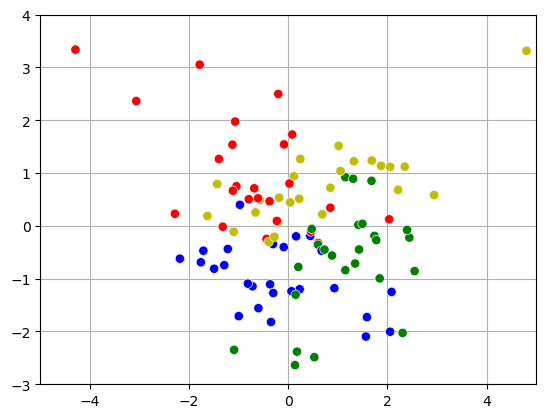

In [3]:
# Number of classes
m = 4

# Generate data with three classes
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=m, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=0.75, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

# Colors for the three classes
colors = ['b', 'r', 'g', 'y']
class_colours = [colors[i] for i in y] 
cmap = matplotlib.colors.ListedColormap(colors[:m])

# Compute the plot boundaries
xl, xh = np.floor(X[:,0].min() - 0.1), np.ceil(X[:,0].max() + 0.1) 
yl, yh = np.floor(X[:,1].min() - 0.1), np.ceil(X[:,1].max() + 0.1)
plt.xlim(xl, xh)
plt.ylim(yl, yh)

# Create grid to calculate the decision boundary on
res = (xh-xl)/300  # Resulution of the grid
xx, yy = np.meshgrid(np.arange(xl, xh, res), np.arange(yl, yh, res))

# Visualize the data
plt.figure(1)
ax = plt.gca()
ax.grid()
ax.scatter(X[:,0], X[:,1], 
           s=45, c=class_colours, edgecolor=plt.cm.gray(.95), lw=0.5, zorder=100);


Train logistic regression and visualize decision boundaries:

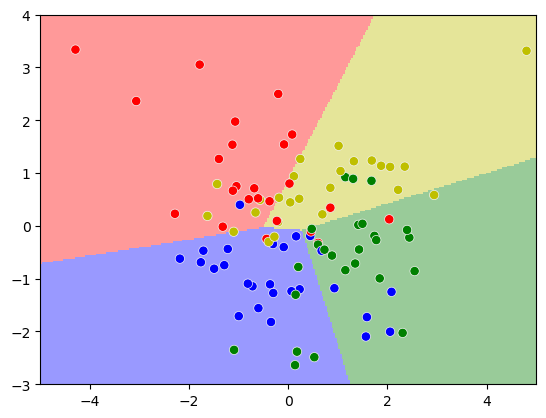

In [4]:
# Train logistic regression
logreg = LogisticRegression(penalty=None, fit_intercept=True, multi_class='multinomial', solver='lbfgs')
logreg.fit(X, y);
# Get model parameters
ws = logreg.coef_
bs = logreg.intercept_

# Classify each point on the grid
#Z = logreg.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Make figure
plt.figure(2)
ax = plt.gca()

# Plot data points
ax.scatter(X[:,0], X[:,1], s=45, c=class_colours, edgecolor=plt.cm.gray(.95), lw=0.5, zorder=100)

# Plot classifications
cax = ax.matshow(Z, cmap=cmap, origin="lower", extent=[xl, xh, yl, yh], aspect="auto", alpha=.4)
        
ax.xaxis.set_ticks_position('bottom')
ax.grid(False)

plt.xlim(xl, xh)
plt.ylim(yl, yh)
plt.show();

Now we plot the $m(m-1)/2$ lines where $\delta_i(x)-\delta_j(x) = 0$ for all $i\neq j$, that is, the hyperplanes defined by the pairwise differences of the decision functions:

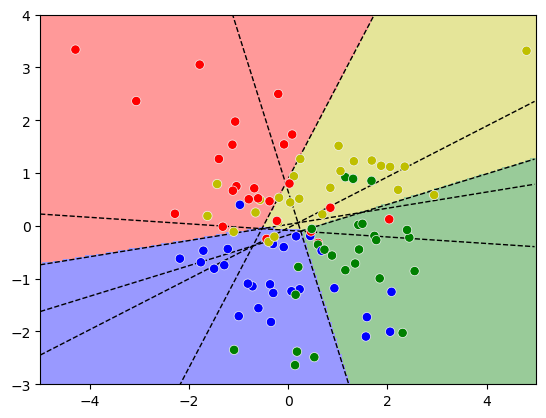

In [5]:
plt.figure(3)
ax = plt.gca()

# Plot points
ax.scatter(X[:,0], X[:,1], s=45, c=class_colours, edgecolor=plt.cm.gray(.95), lw=0.5, zorder=100)

# Plot classifications
cax = ax.matshow(Z, cmap=cmap, origin="lower", extent=[xl, xh, yl, yh], aspect="auto", alpha=.4)
        
ax.xaxis.set_ticks_position('bottom')
ax.grid(False)

if(m==2):  # Special case 2 classes
    print(ws)
    b = -bs/ws[0,1]
    a = -ws[0,0]/ws[0,1]
    x_line = np.arange(xl, xh, res)
    y_line = a * x_line + b 
    ax.plot(x_line, y_line, 'k', lw=1, ls='--')
else:
    for i in np.arange(m-1):
        for j in np.arange(i+1,m):
            w = ws[i]-ws[j]
            b = bs[i]-bs[j]
            b = -b/w[1]
            a = -w[0]/w[1]
            x_line = np.arange(xl, xh, res)
            y_line = a * x_line + b 
            ax.plot(x_line, y_line, "k", lw=1, ls='--')

plt.xlim(xl, xh)
plt.ylim(yl, yh)
plt.show()